<a href="https://colab.research.google.com/github/shaqshree/INTELML/blob/main/Learingtrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import vgg16

In [61]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [62]:
X_train.shape

(50000, 32, 32, 3)

In [63]:
y_train.shape

(50000, 1)

In [64]:
X_test.shape

(10000, 32, 32, 3)

In [65]:
y_test.shape

(10000, 1)

In [66]:
cifar_10_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [67]:
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [68]:
len(np.unique(y_train))


10

In [69]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


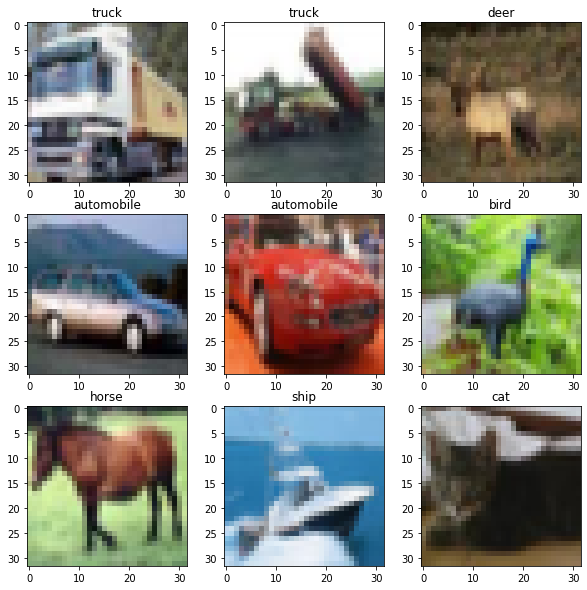

In [70]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i+1])
  plt.title(cifar10_classes[y_train[i+1][0]])

In [71]:

X_train = X_train/255.0
X_test = X_test/255.0

In [72]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [73]:
base_model = vgg16.VGG16(weights=None,include_top = False,input_shape=(32,32,3))


In [74]:
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [103]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax"))
     

In [104]:

model.compile(optimizer="adam", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
     

# Set checkpointer and train model
mdlCheck = keras.callbacks.ModelCheckpoint('cifar100_resnet.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)
callBack = [mdlCheck,es]

In [105]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [106]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [107]:
callbacks_used=[early_stopping,model_checkpoint_callback]

In [108]:

history = model.fit(X_train, y_train,  validation_data=(X_test, y_test),epochs=5,callbacks=callbacks_used)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 2.4166 - accuracy: 0.1058 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3029 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.1000


In [109]:
import pandas as pd
ne=history.epoch

data = pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,2.416624,0.10580,2.302937,0.1
1,2.302887,0.09756,2.302695,0.1
2,2.302812,0.09962,2.302649,0.1
3,2.302807,0.10030,2.302634,0.1
4,2.302755,0.10038,2.302654,0.1


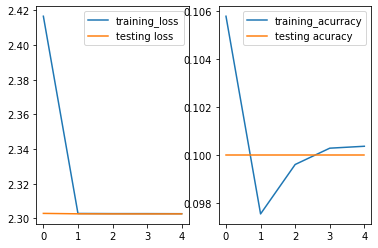

In [112]:

plt.subplot(1,2,1)
plt.plot(ne,data['loss'],label="training_loss")
plt.plot(ne,data['val_loss'],label="testing loss")
plt.legend()

plt.subplot(1,2,2)

plt.plot(ne,data['accuracy'],label="training_acurracy")
plt.plot(ne,data['val_accuracy'],label="testing acuracy")

plt.legend()